# Load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
#supress warnings
import warnings
warnings.filterwarnings("ignore")
#train test split
from sklearn.model_selection import train_test_split
#feature selection
from sklearn.feature_selection import SelectKBest, chi2
#feature engineering
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score, confusion_matrix, classification_report

# import telecom dataset into a pandas data frame
df_happy = pd.read_csv('2015.csv')

# visualize column names
df_happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [2]:
print("There are {} number of observations with {} features".format(len(df_happy), len(df_happy.columns)))
print("Sample data:")
print()
df_happy.head()

There are 158 number of observations with 12 features
Sample data:



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df_happy.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# Common Dataframe Operations



In [5]:
def print_missing_values(df):
  print("Total missing values:",df.isnull().sum().sum())
  print("***************")
  res = dict()
  for col in df.columns:
    cnt = round((df[col].isnull().sum()/len(df))*100,2)
    if(cnt > 0):
      #res[col] = cnt
      print(col, "->", cnt, "%")  

def plot_missing_data(df):
  sns.heatmap(df.isna().transpose(),cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})   

def plot_data_corr(df):
  missing = pd.DataFrame((df.isnull().sum())*100/df_telco.shape[0]).reset_index()

  plt.figure(figsize=(16,5))
  ax = sns.pointplot('index',0,data=missing)
  plt.xticks(rotation =90,fontsize =7)
  plt.title("Percentage of Missing values")
  plt.ylabel("PERCENTAGE")
  plt.show() 

def cols_specific_type(df,ctype):
  cols = []
  for col in df.columns:
    if (df[col].dtype == ctype[0] or (len(ctype) == 2 and df[col].dtype == ctype[1])):
      cols.append(col)
  return cols  

def print_unique_values(df, column_list):
  # check unique values of each column
  for column in column_list:
      print('Column {} - Unique Values: {}'.format(column, df[column].unique()))

def one_hot_encode(df, column):
    enc_data = pd.get_dummies(df[column])
    df = df.drop(columns = [column])
    return df.join(enc_data)

# Common Visualizations

In [6]:
# Function to create boxplot and histogram for any input numerical variable
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


def percentage_stacked_plot(df, columns_to_plot, target, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df[target]).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['skyblue','lightsalmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title=target, fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

def plot_value_counts(df, col):
  # create a figure
  fig = plt.figure(figsize=(8, 6)) 
  ax = fig.add_subplot(111)

  # proportion of observation of each class
  value_cnt_col = df[col].value_counts(normalize=True)

  # create a bar plot showing the percentage of churn
  value_cnt_col.plot(kind='bar', 
                    ax=ax,
                    color=['green','red'])

  # set title and labels
  ax.set_title('Proportion of observations of {}'.format(col), fontsize=18, loc='left')
  ax.set_xlabel(col, fontsize=14)
  ax.set_ylabel('proportion of observations', fontsize=14)
  ax.tick_params( rotation=45)

  # eliminate the frame from the plot
  spine_names = ('top', 'right', 'bottom', 'left')
  for spine_name in spine_names:
      ax.spines[spine_name].set_visible(False)

def plot_density_plots(df, target, otherfield):
    Mth = sns.kdeplot(df[otherfield][(df[target] == 0) ],color="Red", shade = True)
    Mth = sns.kdeplot(df[otherfield][(df[target] == 1) ],ax =Mth, color="Blue", shade= True)
    Mth.legend(["No " + target,target],loc='upper right')
    Mth.set_ylabel('Density')
    Mth.set_xlabel(otherfield)
    Mth.set_title(otherfield +' by ' + target)

# Missing Data

Total missing values: 0
***************


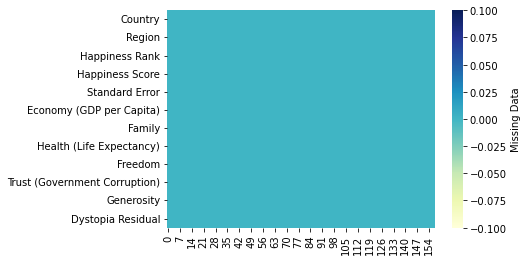

In [7]:
print_missing_values(df_happy) 

plot_missing_data(df_happy)
# null observations of the TotalCharges column
df_happy[df_happy['Happiness Score'].isnull()]

# drop observations with null values
df_happy.dropna(inplace=True)

# EDA

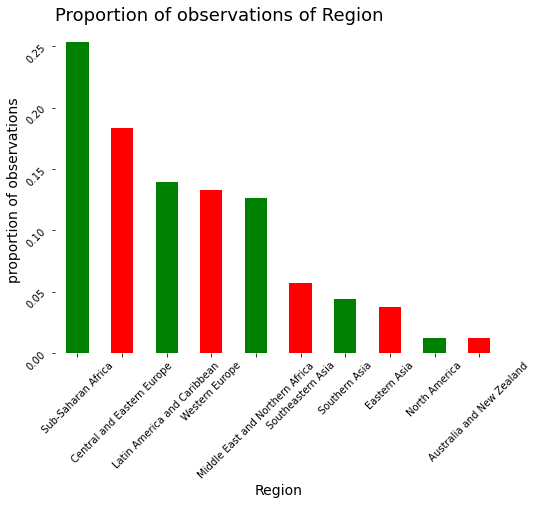

In [8]:
plot_value_counts(df_happy, 'Region')

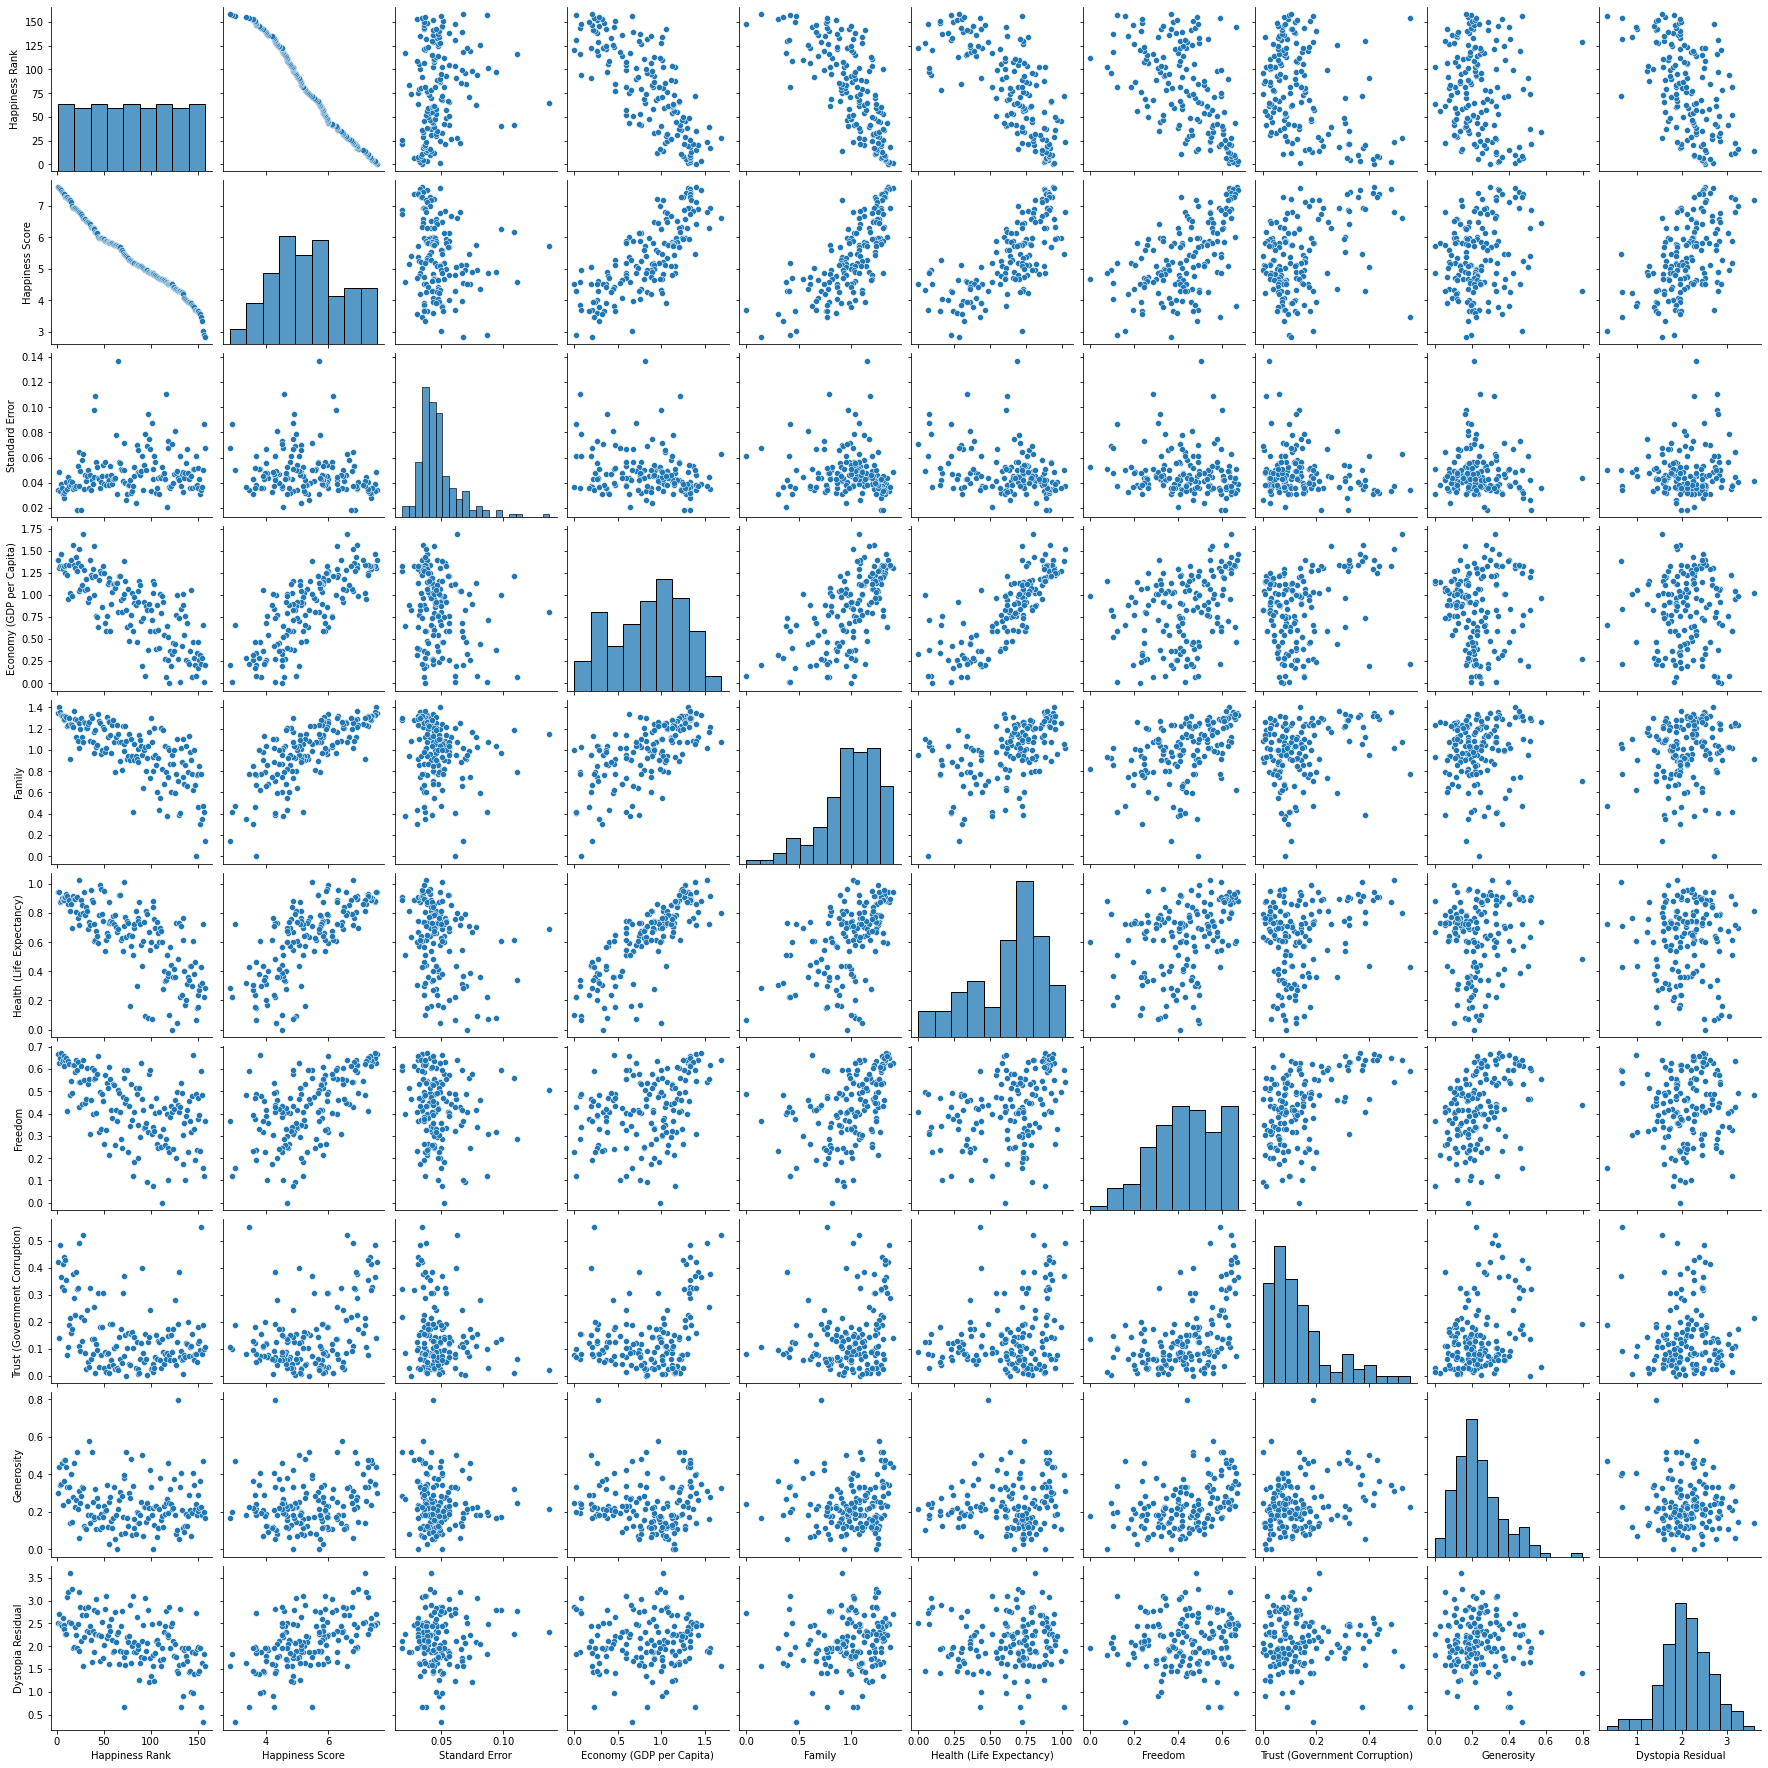

In [9]:
sns.pairplot(df_happy)

In [10]:
df_happy = df_happy.drop(columns='Happiness Rank')
df_happy

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


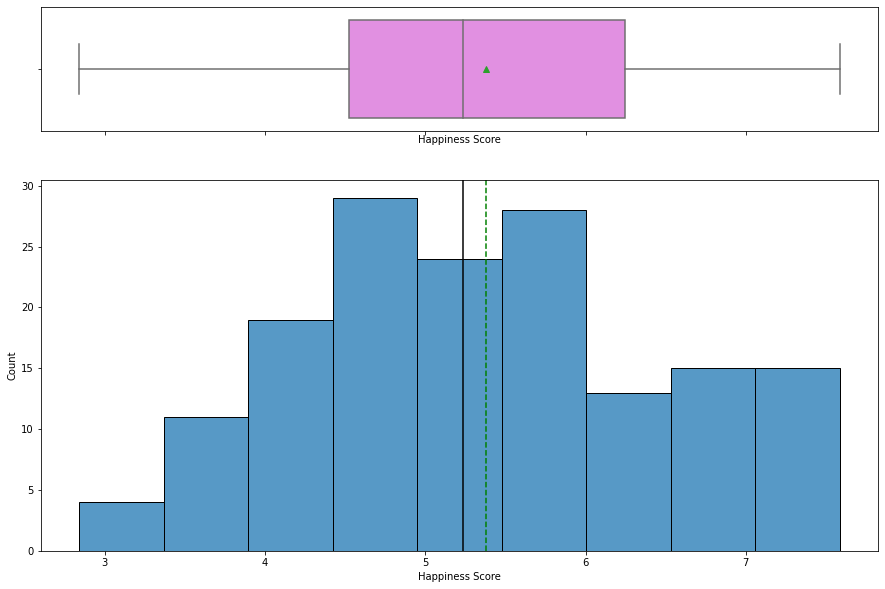

In [11]:
histogram_boxplot(df_happy['Happiness Score'])

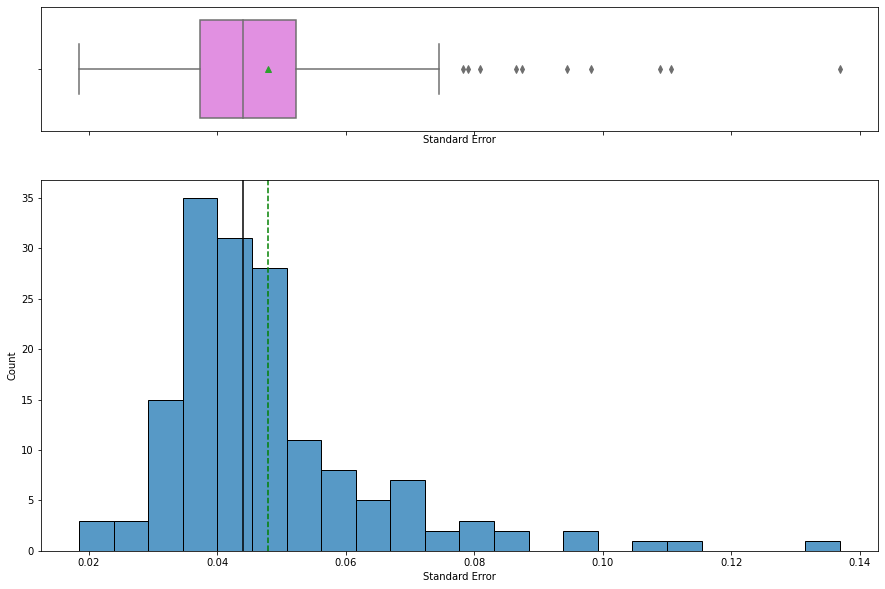

In [12]:
histogram_boxplot(df_happy['Standard Error'])

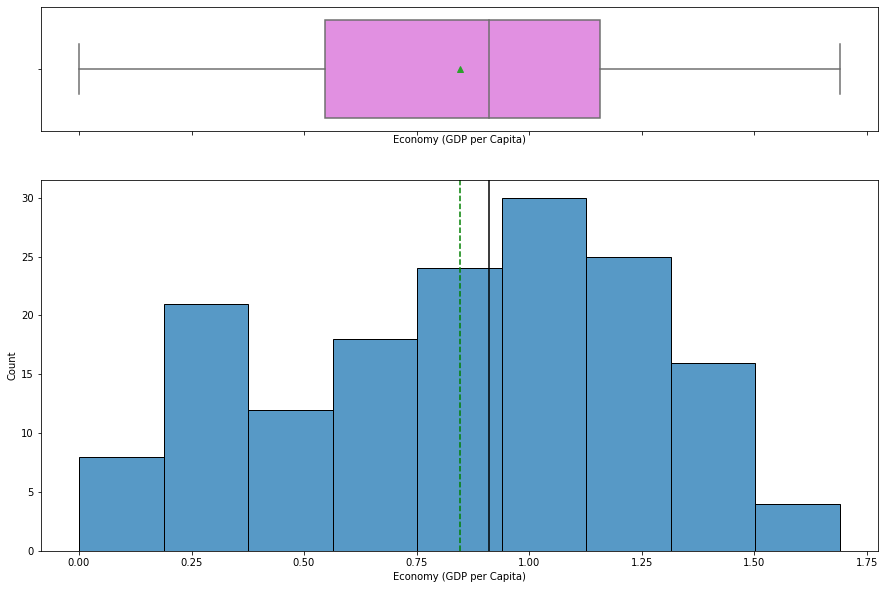

In [13]:
histogram_boxplot(df_happy['Economy (GDP per Capita)'])

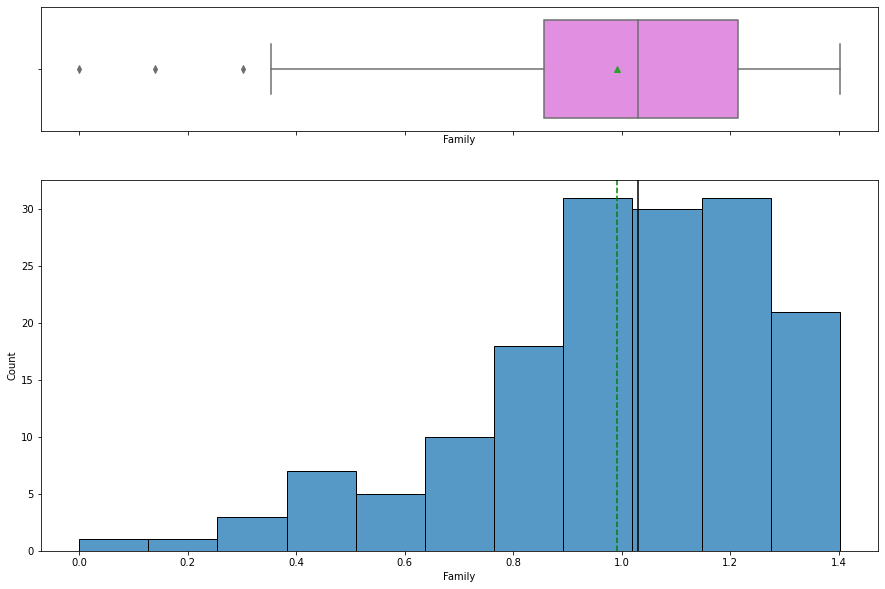

In [14]:
histogram_boxplot(df_happy['Family'])

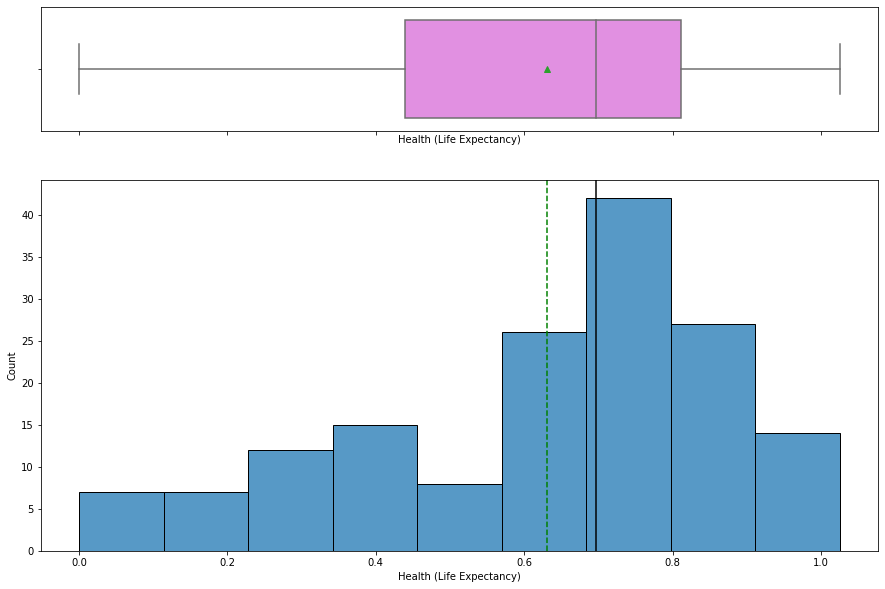

In [15]:
histogram_boxplot(df_happy['Health (Life Expectancy)'])

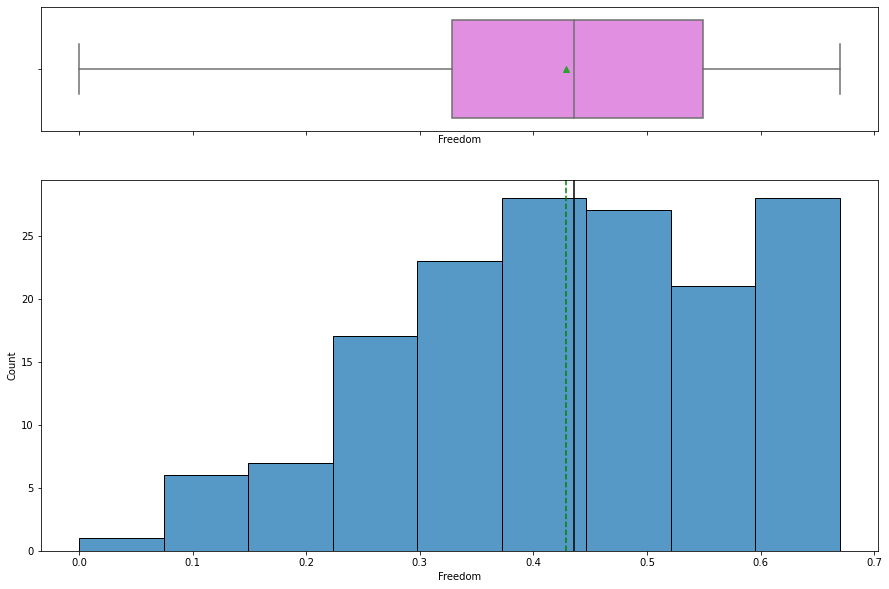

In [16]:
histogram_boxplot(df_happy['Freedom'])

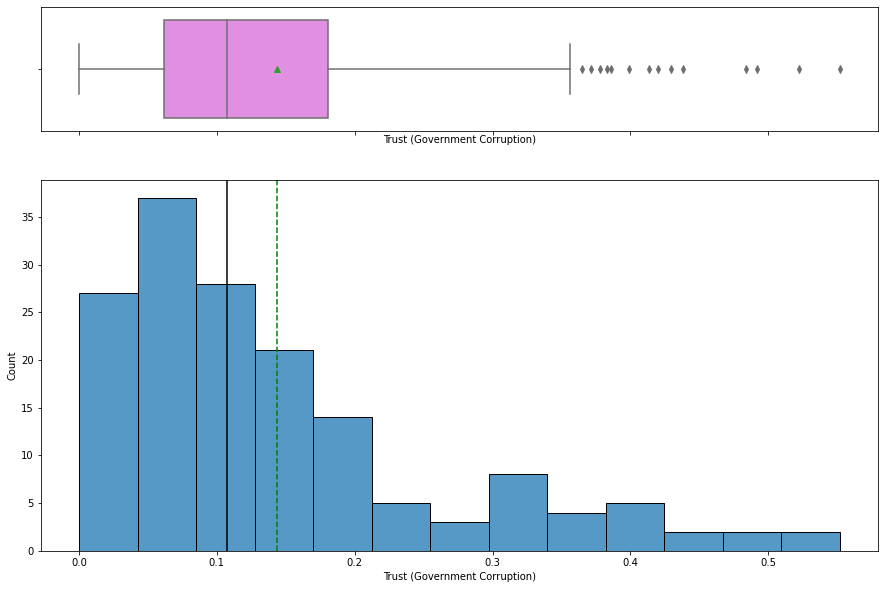

In [17]:
histogram_boxplot(df_happy['Trust (Government Corruption)'])

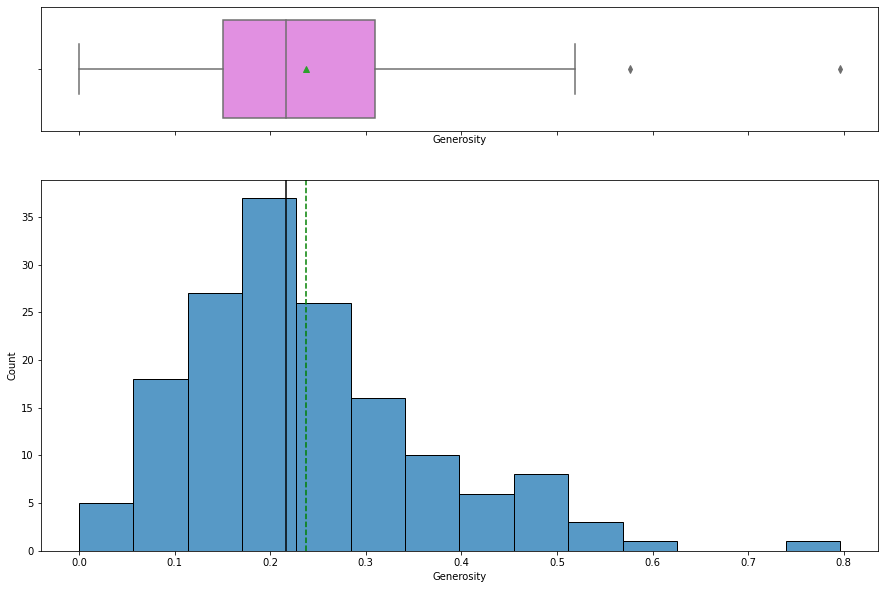

In [18]:
histogram_boxplot(df_happy['Generosity'])

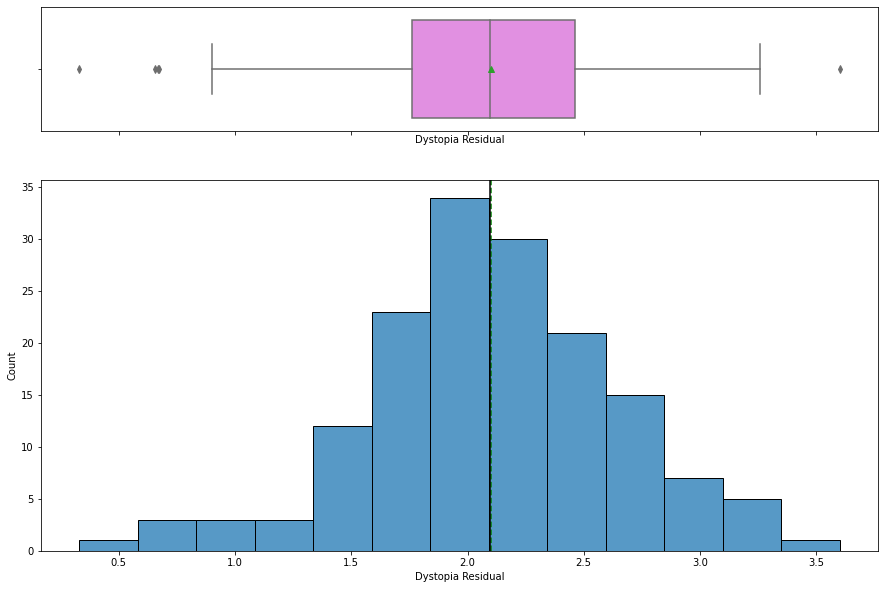

In [19]:
histogram_boxplot(df_happy['Dystopia Residual'])



*   Standard Error -  right skewed
*   Family - left Skewed
*   Health (Life Expectancy) - left skewed
*   Freedom - left skewed
*   Trust (Government Corruption) - right skewed
*   Genorosity - right skewed
*   Dystopia Residual - left skewed










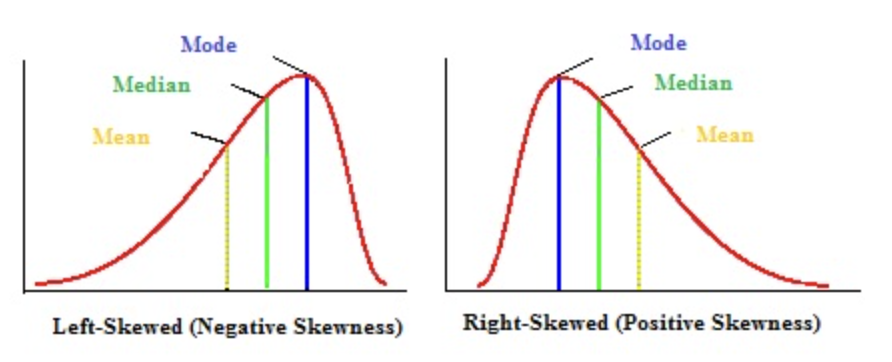

Standard error is inversely proportional to Happiness Score
Dystopia Residual is proportional to Happiness Score



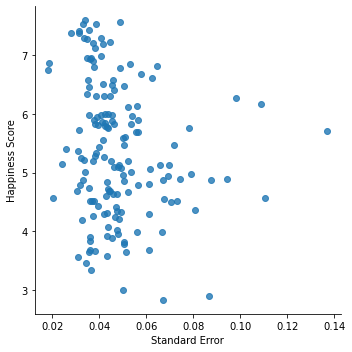

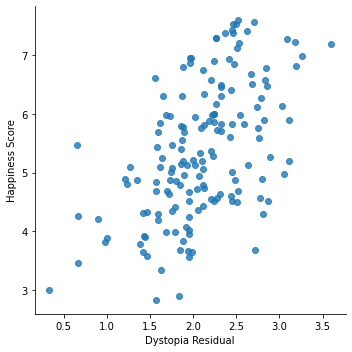

In [20]:

sns.lmplot(data=df_happy, x='Standard Error', y='Happiness Score', fit_reg=False)
sns.lmplot(data=df_happy, x='Dystopia Residual', y='Happiness Score', fit_reg=False)

print("Standard error is inversely proportional to Happiness Score")
print("Dystopia Residual is proportional to Happiness Score")
print()

In [21]:
df_happy

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
#define X and y
X = df_happy.drop(columns='Happiness Score')
y = df_happy['Happiness Score']
X

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

# Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numeric_features = ["Standard Error",
                    "Economy (GDP per Capita)",
                    "Family",
                    "Health (Life Expectancy)",
                    "Freedom",
                    "Trust (Government Corruption)",
                    "Generosity",
                    "Dystopia Residual"]
numeric_transformer = Pipeline(
    steps=[("normalizer",Normalizer()),("scaler", StandardScaler())]
)

categorical_features = ["Country","Region"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Linear Regression

In [25]:

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.724


# LassoCV

In [26]:
from sklearn.linear_model import LassoCV
lasso_clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LassoCV())]
)
lasso_clf

lasso_clf.fit(X_train, y_train)
print("model score: %.3f" % lasso_clf.score(X_test, y_test))

model score: 0.701


# RidgeCV

In [27]:
from sklearn.linear_model import RidgeCV
ridge_clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RidgeCV())]
)
ridge_clf

ridge_clf.fit(X_train, y_train)
print("model score: %.3f" % ridge_clf.score(X_test, y_test))


model score: 0.723


# StackingRegressor

In [30]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ("Linear Regressor", clf),
    ("Lasso Regressor", lasso_clf),
    ("Ridge Regressor", ridge_clf),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

StackingRegressor(estimators=[('Linear Regressor',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('normalizer',
                                                                                                  Normalizer()),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['Standard '
                                                                                  'Error',
                                                                                  'Economy '
                                                                   

In [31]:
stacking_regressor.fit(X_train, y_train)
print("model score: %.3f" % ridge_clf.score(X_test, y_test))

#test
ridge_clf.predict(X_test)

model score: 0.723


array([7.14814624, 5.53207095, 4.49276493, 4.30996766, 5.74996772,
       4.30808305, 4.24675504, 4.31442367, 5.27380545, 5.07698765,
       6.39246435, 4.23263052, 6.329135  , 5.6953577 , 4.8343074 ,
       5.38628926, 5.60972907, 5.06071045, 4.87854325, 5.93030716,
       5.68268379, 5.55665638, 5.35329696, 6.85817725, 5.72115807,
       5.89436158, 6.08979776, 6.14900036, 3.92393693, 4.57068378,
       5.22949711, 5.1540297 ])

In [32]:
import pickle
pickle.dump(ridge_clf, open('model.pkl','wb'))

# Inference

In [33]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(X_test))

[7.14814624 5.53207095 4.49276493 4.30996766 5.74996772 4.30808305
 4.24675504 4.31442367 5.27380545 5.07698765 6.39246435 4.23263052
 6.329135   5.6953577  4.8343074  5.38628926 5.60972907 5.06071045
 4.87854325 5.93030716 5.68268379 5.55665638 5.35329696 6.85817725
 5.72115807 5.89436158 6.08979776 6.14900036 3.92393693 4.57068378
 5.22949711 5.1540297 ]


In [34]:
#test sample data
unknown_data = X_test[:2]
unknown_data

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
7,Sweden,Western Europe,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
44,Slovakia,Central and Eastern Europe,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639


In [35]:
#build new data
new_data = pd.DataFrame({'Country': ['Sweden','Slovakia'],
                   'Region': ['Western Europe','Central and Eastern Europe'],
                   'Standard Error': [0.03157,0.04267],
                    'Economy (GDP per Capita)': [1.33171, 1.16891],      
                    'Family':[1.33171, 1.16891],
                    'Health (Life Expectancy)': [1.28907,1.26999],
                    'Freedom': [0.91087,0.78902],
                    'Trust (Government Corruption)':[0.43844,0.03431],
                    'Generosity':[0.36262,0.36262],
                    'Dystopia Residual': [2.37119,2.24639]})
new_data

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Sweden,Western Europe,0.03157,1.33171,1.33171,1.28907,0.91087,0.43844,0.36262,2.37119
1,Slovakia,Central and Eastern Europe,0.04267,1.16891,1.16891,1.26999,0.78902,0.03431,0.36262,2.24639


In [36]:
#unknown_data.append(new_data)

In [37]:
ridge_clf.predict(new_data)

array([6.65756494, 4.91729064])

In [44]:
#ridge_clf.predict(pd.DataFrame(['Sweden', 'Western Europe', 
#        0.03157, 1.33171, 1.33171, 1.28907, 0.91087, 0.43844, 0.36262, 2.37119]))